# Graphical representations for Annexe

## Imports

In [11]:
import sys
import os
import os.path
import io
import csv
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import gamma
from scipy import integrate
import seaborn as sns
import numpy.random as nprand
from scipy.stats import gamma

## Usefull functions

In [12]:
#simpson method
def simpson(f, a, b, n): 
    pas = (b - a) / n
    somme = (f(a) + f(b)) / 2 + 2 * f(a + pas / 2)  # We initialize the sum
    x = a + pas           # The sum begins at x_1 
    for i in range(1, n): # It computes the sum 
        somme += f(x) + 2 * f(x + pas / 2)
        x += pas
    return somme * pas / 3   # It returns this sum times the step / 3  

In [13]:
# Gamma function
c=1
coeff_gamma=0.6
def gamma_func(aff):
    integral=1/coeff_gamma*np.exp(-aff*1/coeff_gamma)
    return integral

# Numercial computation of the moments <x^n>_0
def x_0_func(aff):
    integral=(c*aff)/(1+c*aff)*gamma_func(aff)
    return integral
def x2_0_func(aff):
    integral=((c*aff)/(1+c*aff))**2*gamma_func(aff)
    return integral
def x3_0_func(aff):
    integral=((c*aff)/(1+c*aff))**3*gamma_func(aff)
    return integral
def x4_0_func(aff):
    integral=((c*aff)/(1+c*aff))**4*gamma_func(aff)
    return integral

## Binding probability in function of free PRDM9 concentration

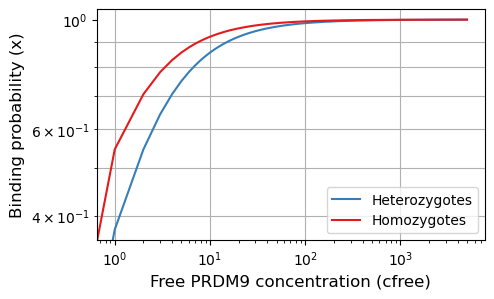

In [16]:
concentration=list(range(0, 5000, 1))
concentration1=[]
gamma_list=[]
link_list=[]
link_hom_list=[]
for i in range(len(concentration)):
    c=concentration[i]
    concentration1.append(c)
    link_list.append(c*0.6/(1+c*0.6))
    link_hom_list.append(2*c*0.6/(1+2*c*0.6))

# Figure
plt.figure(1, figsize=(5,3))
#figure.patch.set_facecolor('white')
#figure.patch.set_alpha(0)
plt.xlabel("Free PRDM9 concentration (cfree)", fontsize = 12)
plt.ylabel("Binding probability (x)", fontsize = 12)
plt.plot(concentration1,link_list,label="Heterozygotes",color='#377eb8')
plt.plot(concentration1,link_hom_list,label="Homozygotes",color='#e41a1c')
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.grid(axis="x")
plt.grid(axis="y",which="minor")

plt.savefig('S6_Fig.png', dpi=200, bbox_inches='tight')

## Finding the empirical mean affinity

In [ ]:
c=2
nbhotsopt=20000
coeff=list(range(0, 500, 1))
print(len(coeff))
j=0
probalink=0
while (probalink<5000 and j<len(coeff)):
    x=nprand.exponential(coeff[j]/100, nbhotsopt)
    probalink=0
    for i in range(nbhotsopt):
        probalink+=c*x[i]/(1+c*x[i])
    j+=1

# Print results
print("Mean Affinity = ",coeff[j]/100)
print("Number of bound sites = ",probalink)
print("lambda = ",1/(coeff[j]/100)) # lambda is the parameter for exponential law

In [ ]:
# import exponential
import numpy as np
import matplotlib.pyplot as plt
  
# Using exponential() method
gfg = np.random.exponential(0.22, 20000) #=> The first parameter corresponds to 1/lambda = E(X)
print("lambda = ",1/0.22)
  
count, bins, ignored = plt.hist(gfg, 100, density = True)
plt.axvline(x=0.22,color="black")
plt.show()

In [ ]:
# Verifications
c=2
coeff=0.22
nbhotsopt=20000
x=nprand.exponential(coeff, nbhotsopt)
probalink=0
for i in range(nbhotsopt):
    probalink+=c*x[i]/(1+c*x[i])
print(probalink)

## Exponential affinity distribution

In [6]:
l=1/0.2
c=1
Y=list(range(0, 15000, 1))
new_Y=[]
z=0.5
exp_fun=[]
exp_erod_fun=[]
for i in range(len(Y)):
    y=Y[i]/10000
    new_Y.append(y)
    exp_fun.append(l*np.exp(-l*y))
    gamma_y=(c*y/(1+c*y))/(c*1/l/(1+c*1/l))
    exp_erod_fun.append(l*np.exp(-l*y)*np.exp(-gamma_y*z))

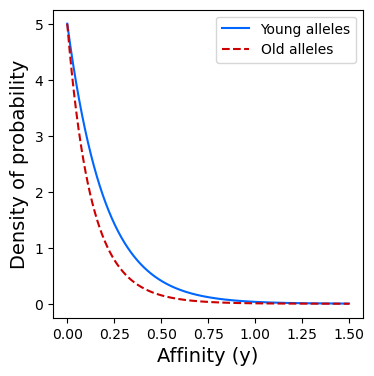

In [8]:
plt.figure(figsize=(4,4))
plt.plot(new_Y,exp_fun,color='#0066ff',label="Young alleles")
plt.plot(new_Y,exp_erod_fun,'--',color='#CC0000',label="Old alleles")
plt.xlabel("Affinity (y)",size=14)
plt.ylabel("Density of probability",size=14)
plt.legend()
plt.savefig('S5_Fig.png', dpi=200, bbox_inches='tight')